In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re as re
import warnings
import wordcloud
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data_final.xlsx to data_final.xlsx


In [555]:
df=pd.read_excel("data_final.xlsx")
df=df.dropna()
df[:2]
len(df)

2969

**1. Obvious fact - Colloquial words used as fillers in chorus and repitions feature on the word cloud, and they are mostly bigrams, which also feature in Adhi's list of most frequent bigrams**

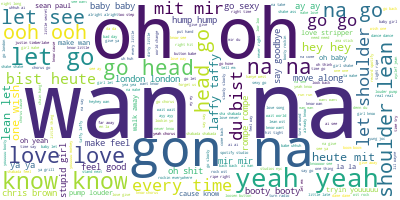

In [556]:
#Brute force word cloud on all lyrics
from wordcloud import WordCloud
long_string = ','.join(df['lyrics_lem'])
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [548]:
!pip install vaderSentiment

In [557]:
#Just a copy of sentiment analysis code
#sentiment analyser
analyser = SentimentIntensityAnalyzer()

#getting the sentiment scores
chk=[]
for items in df['lyrics_lem']:
    chk.append(analyser.polarity_scores(items))

#into a dataframe
scorels=pd.DataFrame(chk)
df=df.merge(scorels,left_index=True, right_index=True)
df[:2]

,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,engagement_high,song_id,neg,neu,pos,compound
0,Chicago,[Verse 1]\nWhen you called me up this morning\...,Hot100,1,Look Away,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,called morning told new love found said happy ...,call morning tell new love find say happy real...,1,4fb25ccd98e9aff41259ccc11c3c636609180e8e,0.022,0.677,0.302,0.9937
1,Bobby Brown,Get busy!\n\n[Chorus]\nEverybody's talking all...,Hot100,2,My Prerogative,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,get busy chorus everybody talking stuff let li...,get busy chorus everybody talk stuff let live ...,1,db815992930d3614142c44154b78798028c7207e,0.090,0.847,0.063,-0.6494


**2. High, Medium, Low buckets based on ranks**

In [0]:
#Topics from the entire list don't give many insights, so trying to group the songs into buckets based on ranks
df['rank_dec'] = pd.qcut(df['rank'], 3, labels=False)
df_high=df[df['rank_dec']==0]
df_med=df[df['rank_dec']==1]
df_low=df[df['rank_dec']==2]

In [0]:
#Function getting most common words - to be used later
def most_common_words(string_series):
    prune_list=['like','chorus','know','say','oh','na','hey','wanna','ya','yeah','go','uh','let','see','bist','du','mir','mit','heute','rompe','shabada','record','spotify'\
              ,'studios','la','ha','feel','nyc','real','keep','lookin','wan','ya','make','tell','come','love','baby','girl','cause','time','ai','man','girl','head','way','right','need'\
              ,'te','wt','yo','ta','end','ke','nd','ly','sy','wit','da','em','fi','od','try','ay','boy','nce','mi','ss','sp','things','think']
    string_series_prune=[]
    for items in string_series:
      for word in prune_list:
        if word in items:
          items=items.replace(word,'')
      string_series_prune.append(items)
    count_vectorizer = CountVectorizer(stop_words='english')
    count_data = count_vectorizer.fit_transform(string_series_prune)
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = list(zip(words, total_counts))

    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    print(count_dict)
    plt.figure(2, figsize=(10, 10/1.6180))
    plt.subplot(title='Most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts)
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    #return new_dict
    #long_string=','.join(string_series_prune)
    #wordcloud = WordCloud(background_color="white", max_words=30, contour_width=3, contour_color='steelblue')
    #return wordcloud.generate(long_string).to_image()


**3. Most common words by rank bucket**
- Have removed the common words which occur across groups and also some slang words - subjective, we can play around with this
- Apart from the common top words like 'love','boy,'girl' etc., which feature across buckets, following are the top words across buckets. There seem to be a difference


[('look', 962.0), ('life', 955.0), ('check', 819.0), ('loon', 780.0), ('bridge', 749.0), ('shit', 741.0), ('run', 680.0), ('word', 667.0), ('pre', 653.0), ('night', 648.0), ('leave', 629.0), ('rock', 626.0), ('tonight', 624.0), ('turn', 590.0), ('lose', 584.0), ('best', 573.0), ('sexy', 564.0), ('grill', 560.0), ('hook', 552.0), ('watch', 544.0), ('bad', 537.0), ('hear', 534.0), ('stop', 524.0), ('pop', 513.0), ('face', 509.0), ('heart', 502.0), ('work', 502.0), ('outro', 501.0), ('song', 489.0), ('walk', 471.0)]


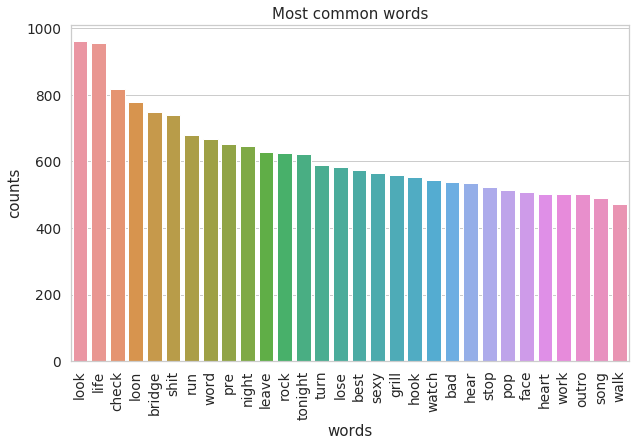

In [404]:
most_common_words(df_high['lyrics_lem'])

[('ffy', 1281.0), ('lean', 1149.0), ('booty', 1134.0), ('leave', 1009.0), ('look', 1005.0), ('shoulder', 955.0), ('hook', 948.0), ('money', 902.0), ('bout', 899.0), ('little', 881.0), ('life', 824.0), ('wish', 814.0), ('hit', 694.0), ('walk', 677.0), ('hump', 620.0), ('heart', 612.0), ('bridge', 602.0), ('ama', 601.0), ('als', 582.0), ('pre', 557.0), ('stop', 552.0), ('work', 548.0), ('bitch', 539.0), ('low', 539.0), ('smack', 538.0), ('ne', 537.0), ('mean', 534.0), ('lk', 533.0), ('ng', 532.0), ('club', 520.0)]


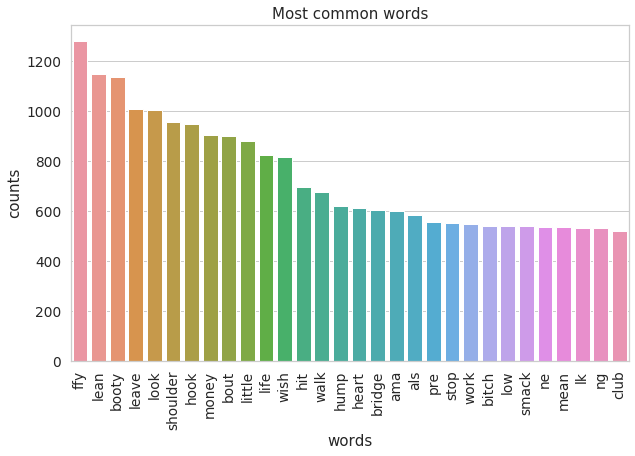

In [405]:
most_common_words(df_med['lyrics_lem'])

[('little', 900.0), ('night', 894.0), ('turn', 862.0), ('thing', 835.0), ('nigga', 703.0), ('que', 668.0), ('look', 653.0), ('life', 628.0), ('leave', 614.0), ('bridge', 611.0), ('pre', 610.0), ('slow', 608.0), ('arou', 600.0), ('ne', 599.0), ('heart', 590.0), ('break', 577.0), ('world', 572.0), ('home', 563.0), ('hook', 562.0), ('cnge', 558.0), ('long', 542.0), ('fuck', 537.0), ('big', 536.0), ('bitch', 536.0), ('stop', 521.0), ('niggas', 519.0), ('eye', 518.0), ('shit', 507.0), ('dream', 494.0), ('run', 492.0)]


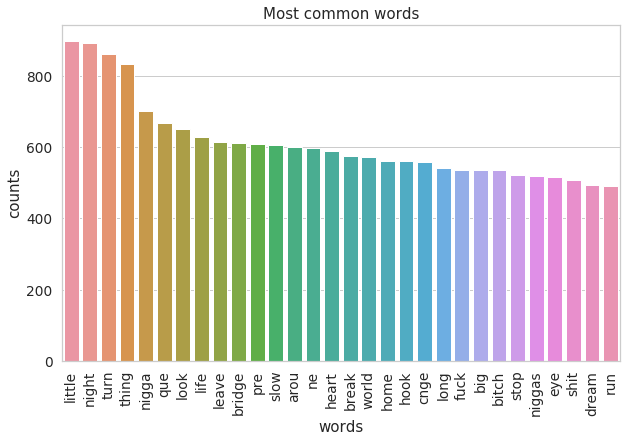

In [406]:
most_common_words(df_low['lyrics_lem'])

**4. Popular artists by sentiment in each bucket**

In [584]:
#No difference in the positive vs negative percentages across groups
print('Percentage of positive/neutral songs by buckets:')
print('High')
print(df_high[df_high['compound']>0]['song'].count()/df_high['song'].count())
print('Med')
print(df_med[df_med['compound']>0]['song'].count()/df_med['song'].count())
print('Low')
print(df_low[df_low['compound']>0]['song'].count()/df_low['song'].count())

#Artists in high bucket who have highest number of songs under each bucket-sentiment combination
print('\n')
print('High Positive:')
print(df_high[df_high['compound']>0]['artist'].value_counts()[:10])
print('\n')
print('High Negative:')
print(df_high[df_high['compound']<0]['artist'].value_counts()[:10])

print('\n')
print('Medium Positive:')
print(df_med[df_med['compound']>0]['artist'].value_counts()[:10])
print('\n')
print('Medium Negative:')
print(df_med[df_med['compound']<0]['artist'].value_counts()[:10])

print('\n')
print('Low Positive:')
print(df_low[df_low['compound']>0]['artist'].value_counts()[:10])
print('\n')
print('Low Negative:')
print(df_low[df_low['compound']<0]['artist'].value_counts()[:10])



Percentage of positive/neutral songs by buckets:
High
0.7073412698412699
Med
0.7471967380224261
Low
0.7049180327868853


High Positive:
Rihanna                                    22
Justin Timberlake                          18
Chris Brown                                18
The Fray                                   17
James Blunt                                16
Cassie                                     16
The Pussycat Dolls Featuring Snoop Dogg    16
Panic! At The Disco                        16
Nelly Featuring Paul Wall, Ali & Gipp      16
Hinder                                     16
Name: artist, dtype: int64


High Negative:
Rihanna                                                  19
The Fray                                                 17
Rascal Flatts                                            16
Gnarls Barkley                                           16
Natasha Bedingfield                                      16
Dem Franchize Boyz Featuring Lil Peanut & Charlay        16


**5. Topic modelling**

In [0]:
#Removing words from series
    def top_mod(string_series):
      prune_list=['like','chorus','know','say','oh','na','hey','wanna','ya','yeah','go','uh','let','see','bist','du','mir','mit','heute','rompe','shabada','record','spotify',\
                  'studios','la','ha','feel','nyc','real','keep','lookin','wan','ya','make','tell','come','love','baby','girl','cause','time','ai','man','girl','head','way','right','need'\
                  ,'te','wt','yo','ta','end','ke','nd','ly','sy','wit','da','em','fi','od','try','ay','boy','nce','mi','ss','sp','things','think','ki','ich','lil']
      string_series_prune=[]
      for items in string_series:
        for word in prune_list:
          if word in items:
            items=items.replace(word,'')
        string_series_prune.append(items)
        ser = pd.Series( (v for v in string_series_prune) )
      return ser

In [532]:
#Function for topic modeling
def print_topics(model, count_vectorizer, num_words):
    words = count_vectorizer.get_feature_names()
    for topic_num, topic_words in enumerate(model.components_):
        print("\nTopic #%d:" % topic_num)
        print(" ".join([words[i]
                        for i in topic_words.argsort()[:-num_words-1:-1]]))

#parameters
number_topics = 2
number_words = 5

#LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

**Topics in overall data**

In [533]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(top_mod(df['lyrics_lem']))

print("Topics found via LDA for high rank group") 
print_topics(lda,count_vectorizer, number_words)

Topics found via LDA for high rank group

Topic #0:
eventual gciator meee legture exnsion

Topic #1:
idfwu gce adivin del clench


**a.Topics in high rank bucket**

In [534]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(top_mod(df_high['lyrics_lem']))

print("Topics found via LDA for high rank group") 
print_topics(lda,count_vectorizer, number_words)

Topics found via LDA for high rank group

Topic #0:
maden oooo vicky succe margheri

Topic #1:
retumbe oon ali hit ex


**b.Topics in medium rank bucket**

In [537]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(top_mod(df_med['lyrics_lem']))
 
print("Topics found via LDA for medium rank group") 
print_topics(lda,count_vectorizer, number_words)

Topics found via LDA for medium rank group

Topic #0:


IndexError: ignored

**c.Topics in low rank bucket**

In [538]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(top_mod(df_low['lyrics_lem']))
print("Topics found via LDA for low rank group") 
print_topics(lda,count_vectorizer, number_words)

Topics found via LDA for low rank group

Topic #0:
little night turn slow long

Topic #1:
que nigga al heart en


**(i)Topics by artists...**
